<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/uas_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Latar Belakang**

#**1. Data Collection**

In [159]:
# Open In Colab

# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/DM/salaries.csv"
df = pd.read_csv(file_path)

# --- Pra-pemrosesan yang Difokuskan ---

# 1. Filter untuk job title yang relevan
filtered_jobs = ['Data Scientist', 'Data Engineer', 'Data Analyst',
                 'Machine Learning Engineer', 'AI Engineer']
df = df[df['job_title'].isin(filtered_jobs)]

# 2. Hanya gunakan tipe pekerjaan Full-Time (FT) untuk perbandingan yang adil
df = df[df['employment_type'] == 'FT']

# 3. Reset index setelah filtering
df = df.reset_index(drop=True)

# 4. Standardisasi penulisan untuk konsistensi
df['job_title'] = df['job_title'].str.title()
df['employee_residence'] = df['employee_residence'].str.upper()

# Menampilkan informasi data setelah dibersihkan
print("Data setelah filtering dan pembersihan:")
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data setelah filtering dan pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56494 entries, 0 to 56493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           56494 non-null  int64 
 1   experience_level    56494 non-null  object
 2   employment_type     56494 non-null  object
 3   job_title           56494 non-null  object
 4   salary              56494 non-null  int64 
 5   salary_currency     56494 non-null  object
 6   salary_in_usd       56494 non-null  int64 
 7   employee_residence  56494 non-null  object
 8   remote_ratio        56494 non-null  int64 
 9   company_location    56494 non-null  object
 10  company_size        56494 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.7+ MB


#**2. Pre Processing**

In [160]:
# Hitung rata-rata gaji per job title dan negara
avg_salary_by_country_job = df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].mean().reset_index()
avg_salary_by_country_job.rename(columns={'salary_in_usd': 'average_salary_usd'}, inplace=True)

# Urutkan data untuk menemukan yang teratas
sorted_salaries = avg_salary_by_country_job.sort_values(by=['job_title', 'average_salary_usd'], ascending=[True, False])

# Ambil top 5 negara untuk setiap job title
top_5_countries_per_job = sorted_salaries.groupby('job_title').head(5).reset_index(drop=True)

# Tampilkan hasil dalam bentuk tabel
print("Top 5 Negara dengan Rata-rata Gaji Tertinggi per Job Title")
print("==========================================================")
print(top_5_countries_per_job.to_string())

Top 5 Negara dengan Rata-rata Gaji Tertinggi per Job Title
                    job_title employee_residence  average_salary_usd
0                 Ai Engineer                 QA       300000.000000
1                 Ai Engineer                 US       184220.464952
2                 Ai Engineer                 UA       143500.000000
3                 Ai Engineer                 JP       139813.000000
4                 Ai Engineer                 CA       137753.023810
5                Data Analyst                 IL       135000.000000
6                Data Analyst                 US       110649.041802
7                Data Analyst                 AU       108979.843373
8                Data Analyst                 MX       105900.235294
9                Data Analyst                 UZ       100000.000000
10              Data Engineer                 PR       167500.000000
11              Data Engineer                 US       155199.051711
12              Data Engineer               

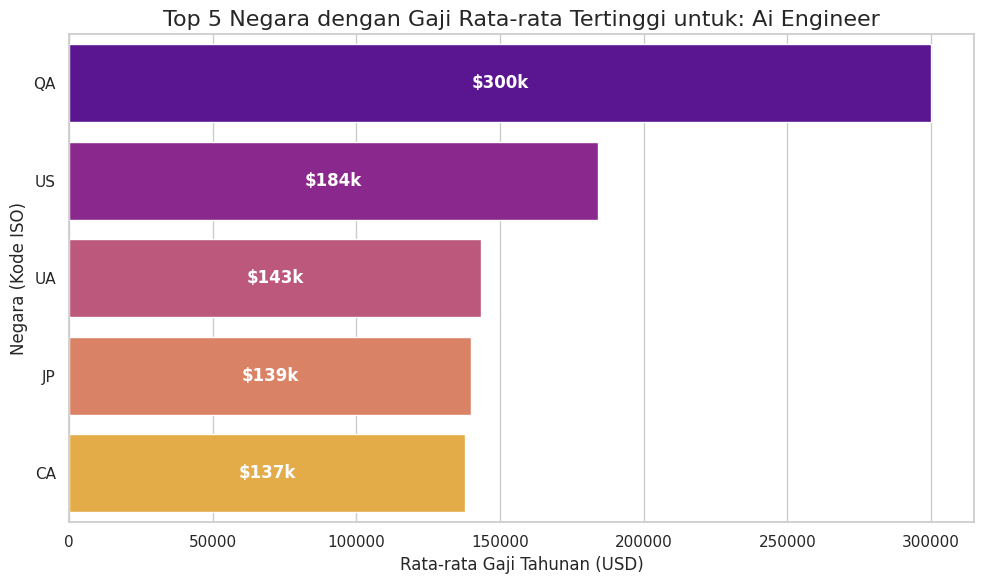

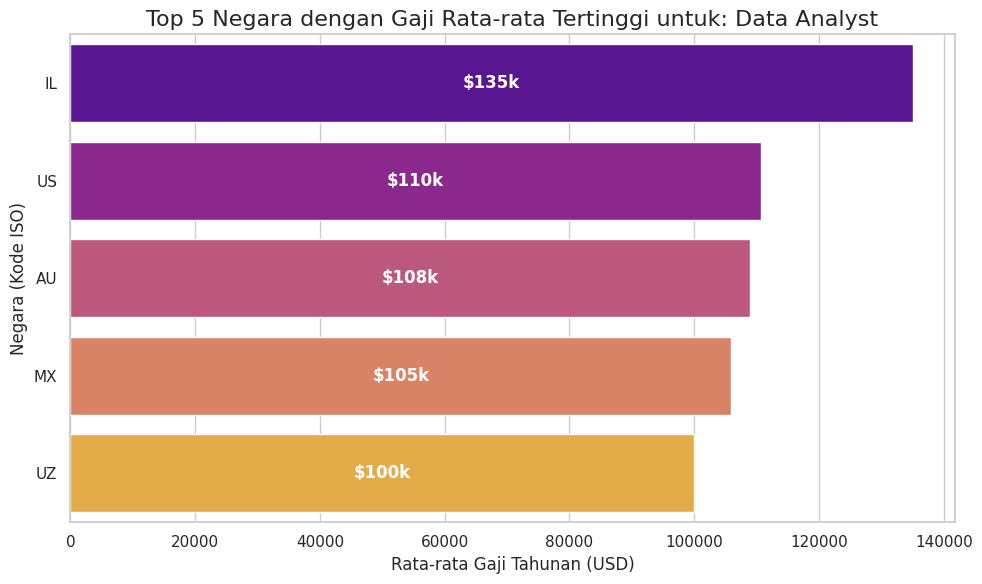

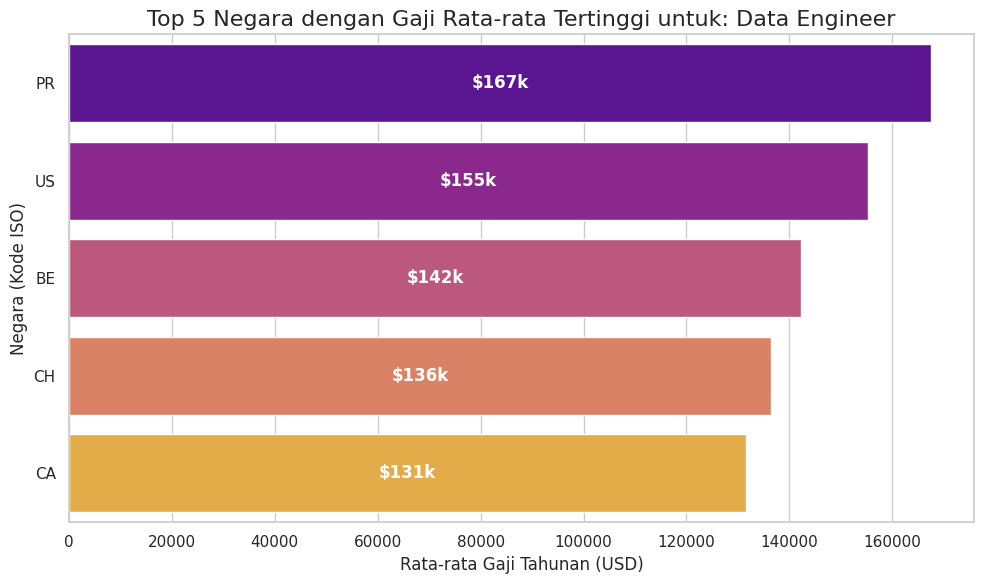

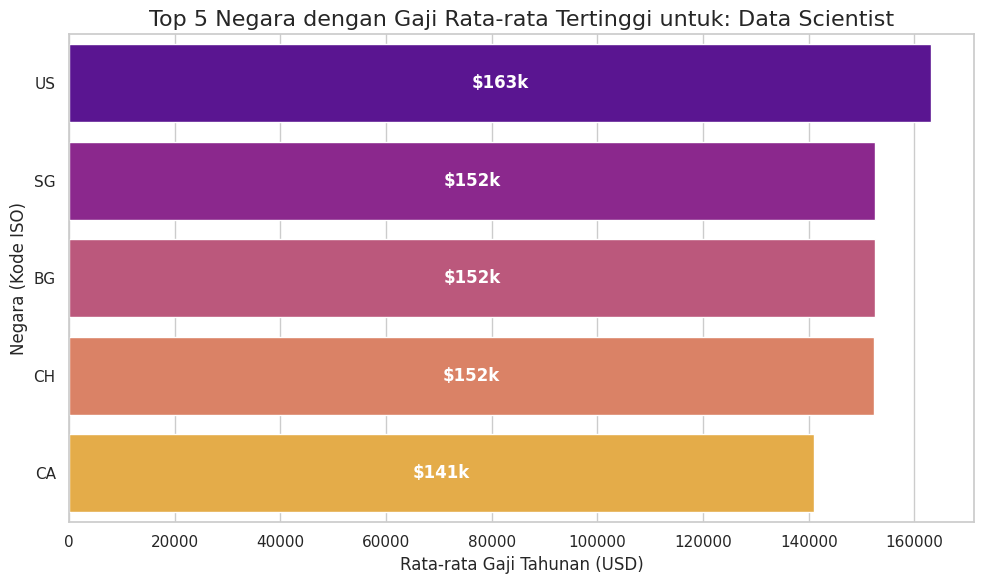

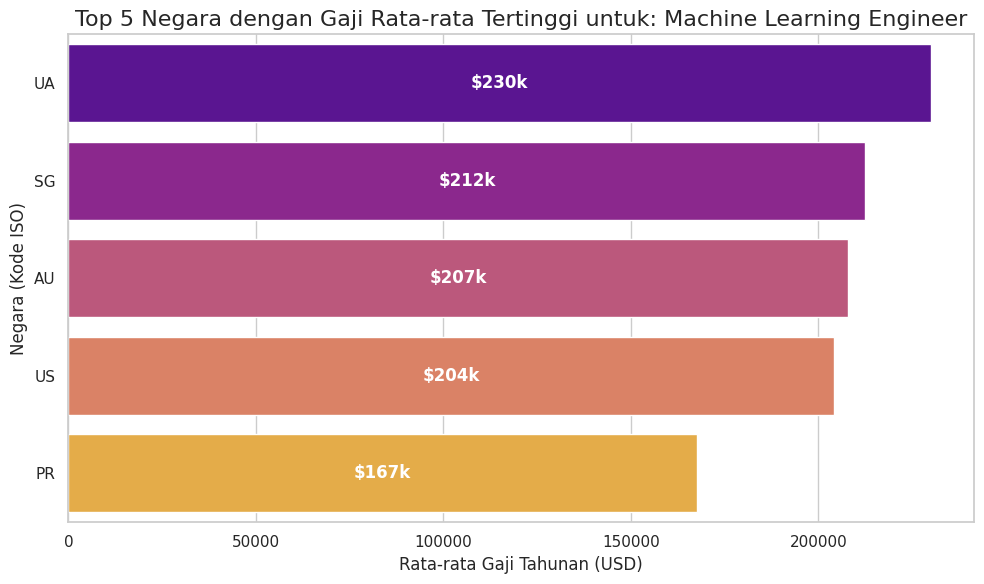

In [161]:
# Set gaya visualisasi
sns.set(style="whitegrid")

# Dapatkan daftar job title unik dari hasil analisis
job_titles_to_plot = top_5_countries_per_job['job_title'].unique()

# Loop untuk membuat plot untuk setiap job title
for title in job_titles_to_plot:
    plt.figure(figsize=(10, 6))

    # Filter data untuk job title saat ini
    plot_data = top_5_countries_per_job[top_5_countries_per_job['job_title'] == title]

    # Buat barplot
    barplot = sns.barplot(
        data=plot_data,
        x='average_salary_usd',
        y='employee_residence',
        palette='plasma',
        hue='employee_residence', # Menambahkan hue untuk palet warna
        legend=False # Menonaktifkan legenda yang tidak perlu
    )

    # Tambahkan label angka pada bar
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width / 2, p.get_y() + p.get_height()/2,
                 f'${int(width/1000)}k',
                 ha="center", va="center", color='white', weight='bold')

    plt.title(f'Top 5 Negara dengan Gaji Rata-rata Tertinggi untuk: {title}', fontsize=16)
    plt.xlabel('Rata-rata Gaji Tahunan (USD)', fontsize=12)
    plt.ylabel('Negara (Kode ISO)', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#**3. EDA**

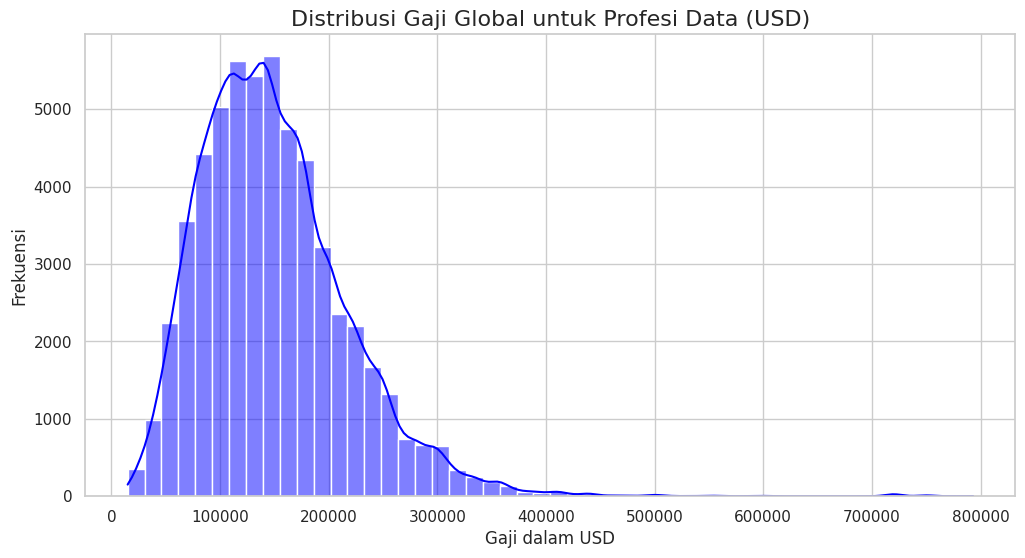

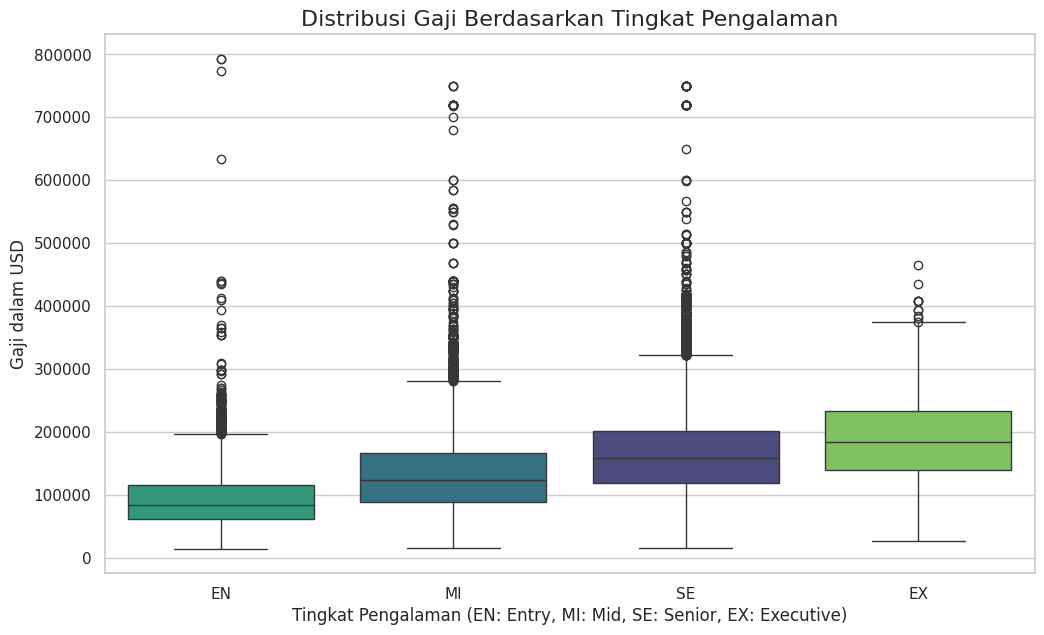

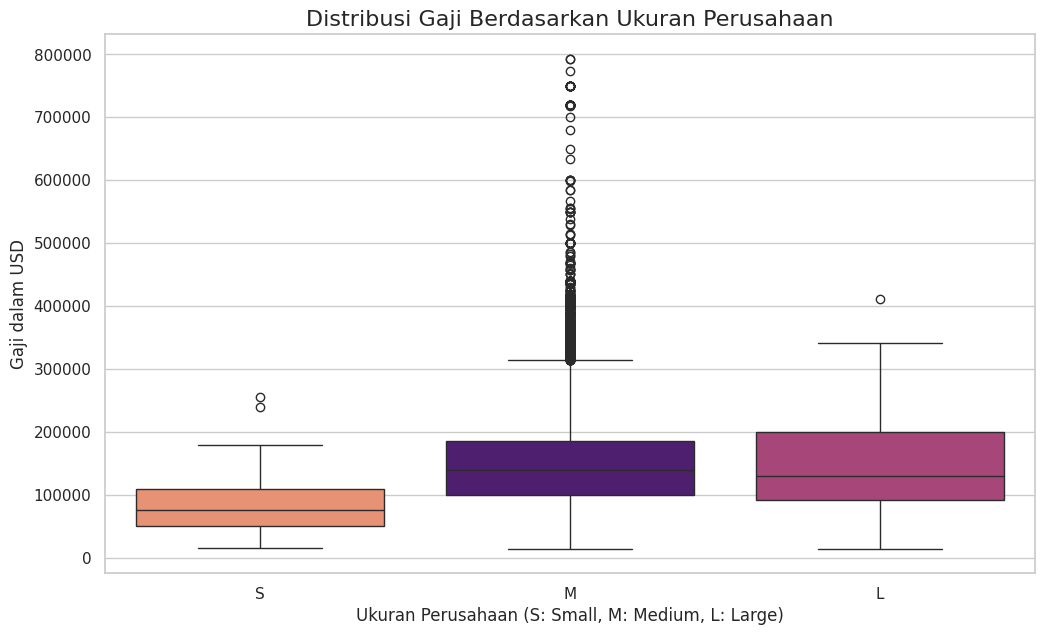

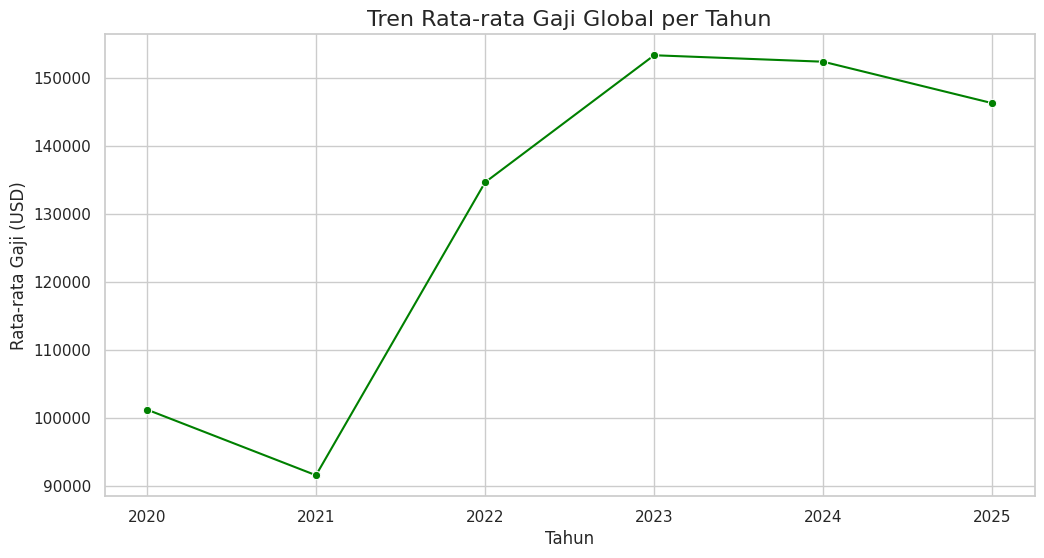

In [162]:
# Set gaya visualisasi untuk semua plot
sns.set(style="whitegrid")

# 1. Distribusi Gaji Keseluruhan (dalam USD)
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=50, color='blue')
plt.title('Distribusi Gaji Global untuk Profesi Data (USD)', fontsize=16)
plt.xlabel('Gaji dalam USD', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

# 2. Boxplot Gaji Berdasarkan Tingkat Pengalaman
plt.figure(figsize=(12, 7))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,
            order=['EN', 'MI', 'SE', 'EX'], palette='viridis',
            hue='experience_level', legend=False)
plt.title('Distribusi Gaji Berdasarkan Tingkat Pengalaman', fontsize=16)
plt.xlabel('Tingkat Pengalaman (EN: Entry, MI: Mid, SE: Senior, EX: Executive)', fontsize=12)
plt.ylabel('Gaji dalam USD', fontsize=12)
plt.show()

# 3. Boxplot Gaji Berdasarkan Ukuran Perusahaan
plt.figure(figsize=(12, 7))
sns.boxplot(x='company_size', y='salary_in_usd', data=df,
            order=['S', 'M', 'L'], palette='magma',
            hue='company_size', legend=False)
plt.title('Distribusi Gaji Berdasarkan Ukuran Perusahaan', fontsize=16)
plt.xlabel('Ukuran Perusahaan (S: Small, M: Medium, L: Large)', fontsize=12)
plt.ylabel('Gaji dalam USD', fontsize=12)
plt.show()

# 4. Tren Rata-rata Gaji dari Tahun ke Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', estimator='mean', marker='o', errorbar=None, color='green')
plt.title('Tren Rata-rata Gaji Global per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Gaji (USD)', fontsize=12)
plt.grid(True)
plt.show()

#**4. Feature Engineering**

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Hapus kolom yang tidak akan digunakan dalam model
# 'salary' dan 'salary_currency' redundan dengan 'salary_in_usd'
df_model = df.drop(columns=['salary', 'salary_currency'])

# Pisahkan fitur kategorikal dan numerik
# 'work_year' dan 'remote_ratio' bisa dianggap sebagai numerik
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

# Buat preprocessor menggunakan ColumnTransformer
# OneHotEncoder akan menangani nilai yang tidak terlihat di data tes (handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Biarkan kolom sisa tidak diubah
)

print("Preprocessor untuk fitur kategorikal dan numerik telah dibuat.")

Preprocessor untuk fitur kategorikal dan numerik telah dibuat.


#**5. Encode & Split**

In [164]:
from sklearn.model_selection import train_test_split

# Definisikan X (fitur) dan y (target)
X = df_model.drop('salary_in_usd', axis=1)
y = df_model['salary_in_usd']

# Bagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data berhasil dibagi:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data berhasil dibagi:
X_train shape: (45195, 8)
X_test shape: (11299, 8)
y_train shape: (45195,)
y_test shape: (11299,)


#**6. Model Training**

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Buat pipeline yang menggabungkan preprocessor dan model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)) # n_jobs=-1 untuk menggunakan semua core CPU
])

# Latih model dengan data training
print("Memulai training model Random Forest...")
rf_pipeline.fit(X_train, y_train)
print("Training selesai.")

# Lakukan prediksi pada data test
y_pred = rf_pipeline.predict(X_test)

# Evaluasi performa model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Hasil Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Artinya, model dapat menjelaskan sekitar {r2:.1%} variasi pada data gaji.")

Memulai training model Random Forest...
Training selesai.

--- Hasil Evaluasi Model ---
Mean Absolute Error (MAE): $41,020.55
R-squared (R2) Score: 0.3266
Artinya, model dapat menjelaskan sekitar 32.7% variasi pada data gaji.


#**7. Visualisasi**


--- Visualisasi: Top 5 Negara dengan Gaji Tertinggi per Profesi ---


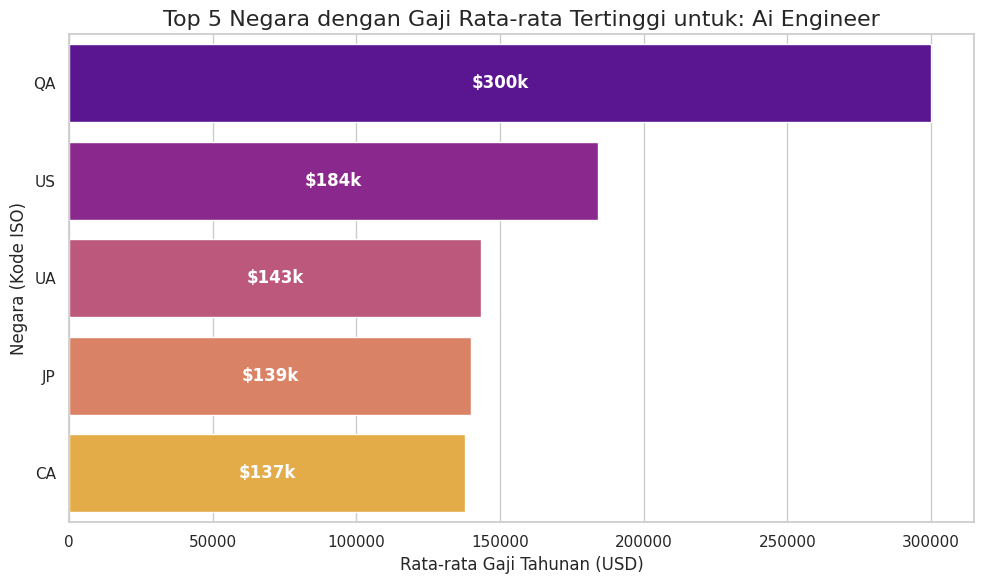

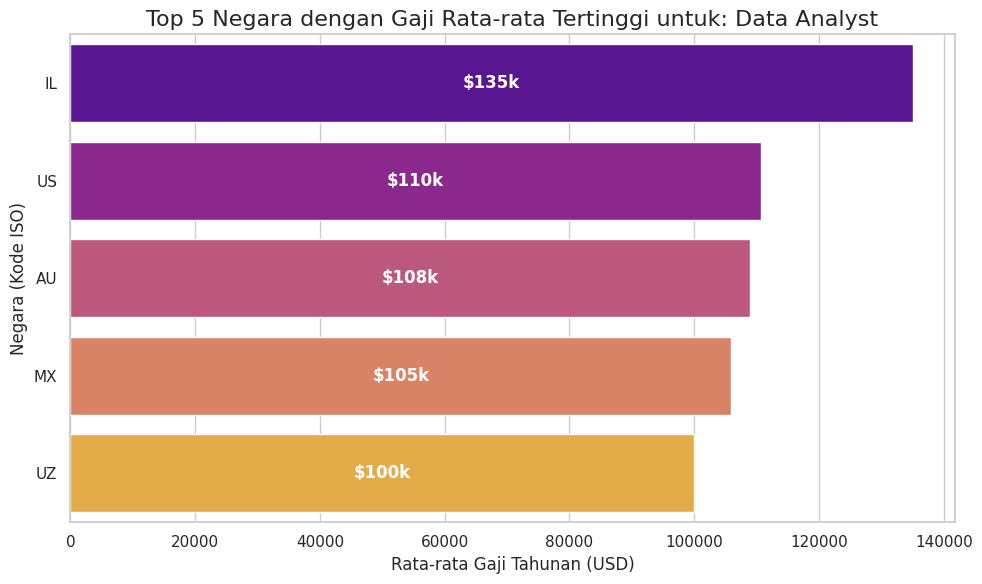

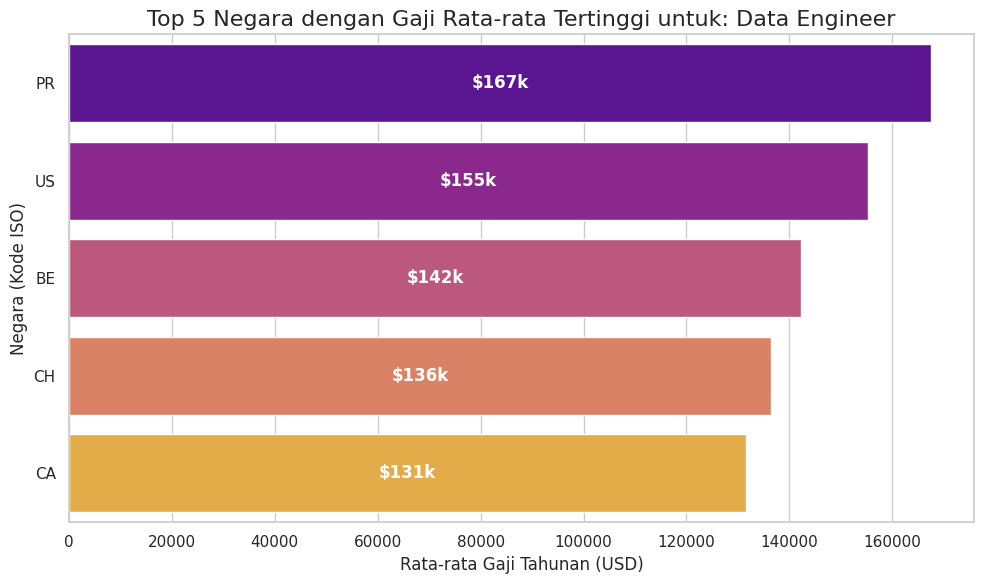

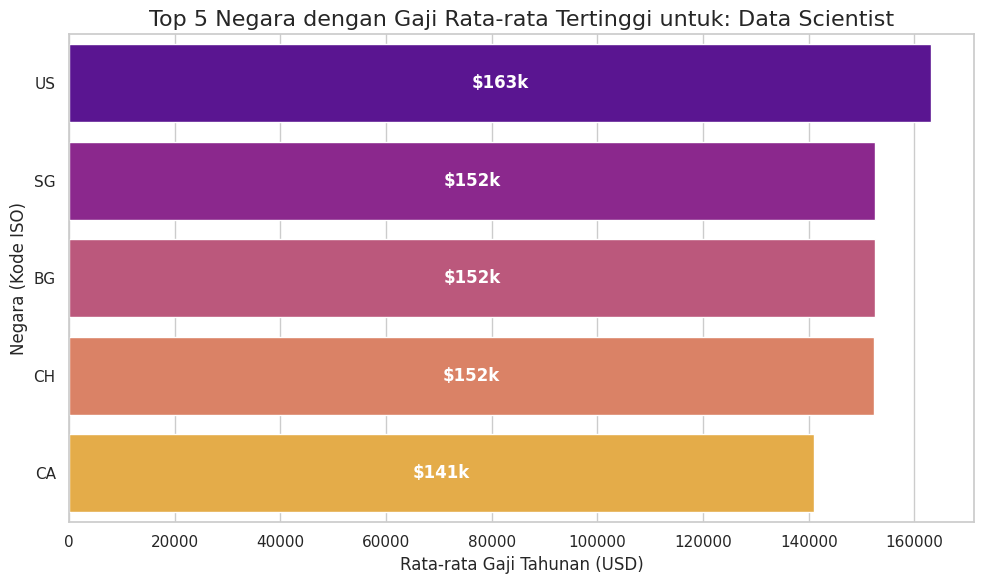

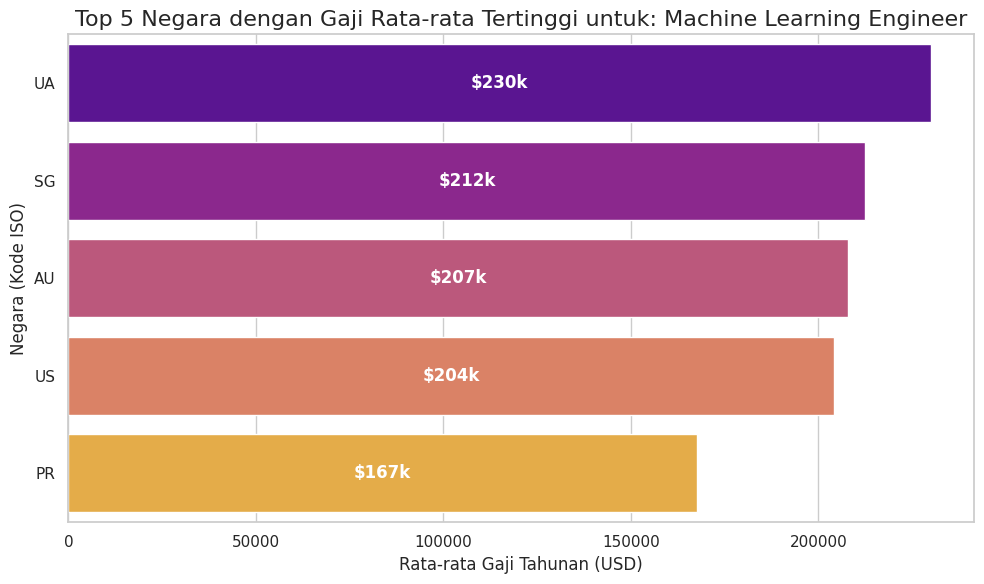


--- Visualisasi: Evaluasi Performa Model Prediksi ---


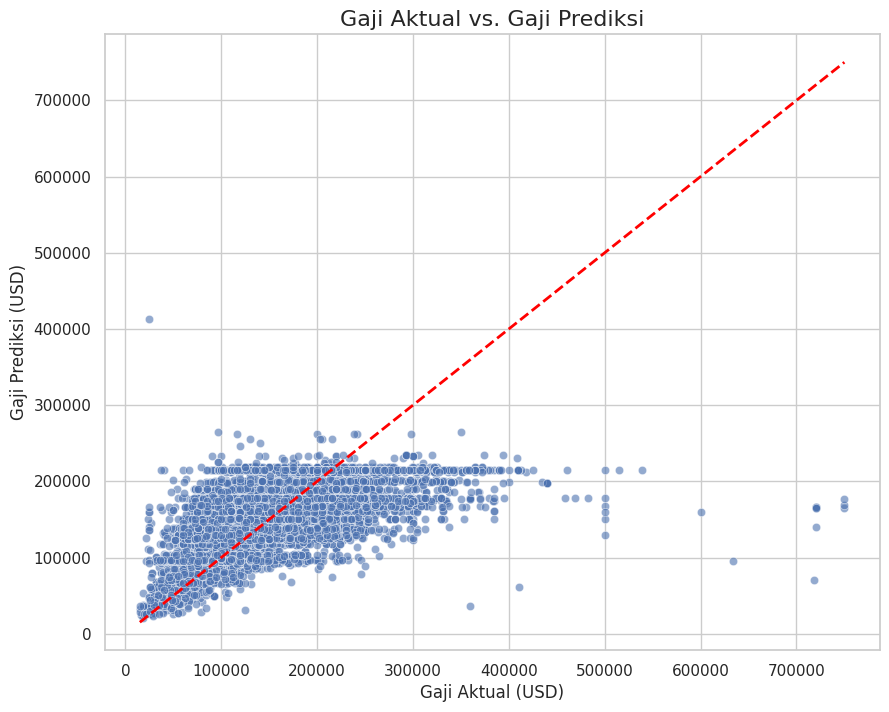

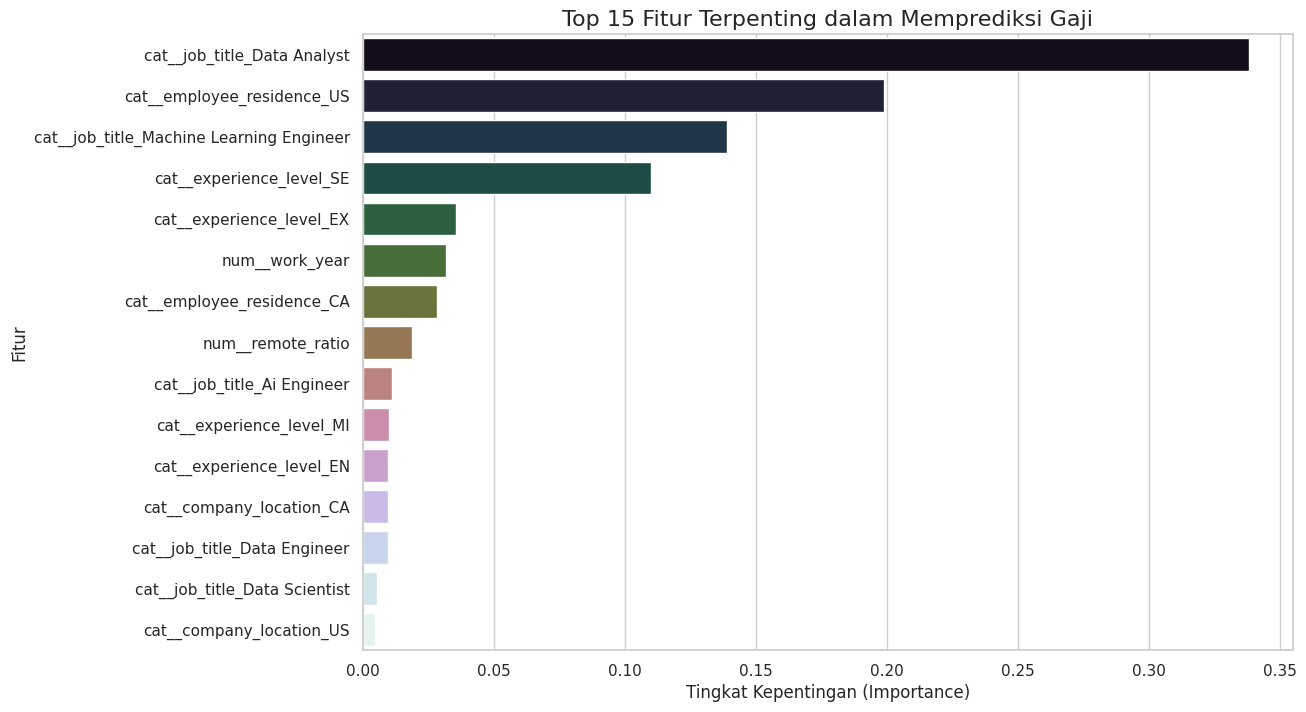

In [166]:
# --- Visualisasi Hasil Analisis (Top 5 Negara per Job Title) ---
# Kode ini dipindahkan dari bagian atas untuk menyatukan semua visualisasi di sini

print("\n--- Visualisasi: Top 5 Negara dengan Gaji Tertinggi per Profesi ---")
# Set gaya visualisasi
sns.set(style="whitegrid")
job_titles_to_plot = top_5_countries_per_job['job_title'].unique()

for title in job_titles_to_plot:
    plt.figure(figsize=(10, 6))
    plot_data = top_5_countries_per_job[top_5_countries_per_job['job_title'] == title]
    barplot = sns.barplot(data=plot_data, x='average_salary_usd', y='employee_residence', palette='plasma', hue='employee_residence', legend=False)
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width / 2, p.get_y() + p.get_height()/2, f'${int(width/1000)}k', ha="center", va="center", color='white', weight='bold')
    plt.title(f'Top 5 Negara dengan Gaji Rata-rata Tertinggi untuk: {title}', fontsize=16)
    plt.xlabel('Rata-rata Gaji Tahunan (USD)', fontsize=12)
    plt.ylabel('Negara (Kode ISO)', fontsize=12)
    plt.tight_layout()
    plt.show()


# --- Visualisasi Hasil Evaluasi Model ---

print("\n--- Visualisasi: Evaluasi Performa Model Prediksi ---")
# 1. Visualisasi: Actual vs. Predicted Salary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title('Gaji Aktual vs. Gaji Prediksi', fontsize=16)
plt.xlabel('Gaji Aktual (USD)', fontsize=12)
plt.ylabel('Gaji Prediksi (USD)', fontsize=12)
plt.show()


# 2. Visualisasi: Feature Importance
# Ekstrak nama fitur setelah encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Buat dataframe untuk feature importance
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15) # Ambil 15 fitur terpenting

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='cubehelix', hue='feature', legend=False)
plt.title('Top 15 Fitur Terpenting dalam Memprediksi Gaji', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()